# Lotka-Volterra Model #
### By: Mary Fung

In [77]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [78]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    system: System object
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
        
    return frame

In [90]:
def update_func(state, t, system):
    """Update the model.
    
    state: State (x, y)
    t: time
    system: System object
    
    returns: State (xy)
    """
    unpack(system)
    x, y = state

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
        
    x += dxdt
    y += dydt
    
    return State(x=x, y=y)

In [91]:
init = State(x=1, y=1)

,values
x,1
y,1


In [92]:
system = System(alpha=0.05,
                beta=0.1,
                gamma=0.1,
                delta=0.1,
                t0=0,
                t_end=200)

,values
alpha,0.05
beta,0.10
gamma,0.10
delta,0.10
t0,0.00
t_end,200.00


results = run_simulation(system, update_func)
results.head()

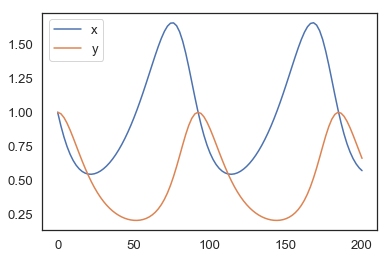

In [93]:
results.plot()

### Using the ODE Solver


In [94]:
def  slope_func(state, t, system):
    """Compute slopes for the Lotka-Volterra model.
    
    state: State(x, y)
    t: time
    system: System object
    
    returns: pair of derivatives
    """
    unpack(system)
    x, y = state

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    
    return dxdt, dydt

In [95]:
system.set(init=init, t_end=200)

In [96]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,134
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


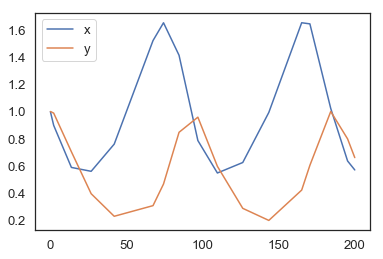

In [97]:
results.plot()

In [98]:
system.set(init=init, t_end=200)
results, details = run_ode_solver(system, slope_func, max_step=2)
details

,values
sol,None
t_events,[]
nfev,608
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


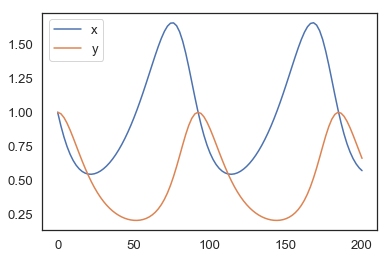

In [99]:
results.plot()

### Euler, running for a longer duration

In [100]:
system.set(t_end=2000)
results = run_simulation(system, update_func)
results.head()

,x,y
0.0,1,1
1.0,0.95,1
2.0,0.9025,0.995
3.0,0.857826,0.985299
4.0,0.816196,0.97129


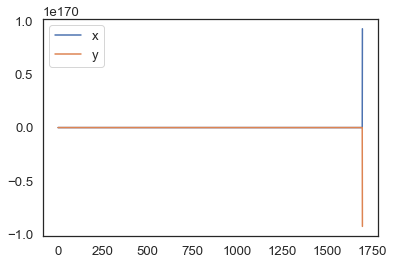

In [101]:
results.plot()

### Running the ODE solver for a longer duration

In [102]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,1172
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


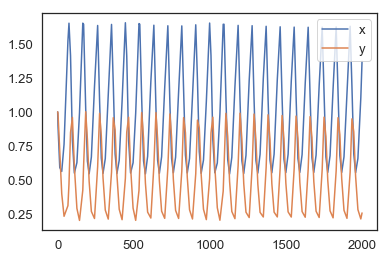

In [103]:
results.plot()